## Load Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

## Import Data

In [2]:
df_num_origin = pd.read_csv('aau1043_dnm.tsv')
df_parental_age = pd.read_csv('aau1043_parental_age.tsv')

In [3]:
df_num_origin

,Chr,Pos,Ref,Alt,Proband_id,Phase_combined,Crossover,Sanger
0,chr1,241097646,C,T,99379,father,paternal_crossover,confirmed
1,chr10,29202943,A,G,8147,father,maternal_crossover,PCR failed
2,chr11,129441657,C,T,5410,mother,maternal_crossover,confirmed
3,chr13,96867147,A,G,46025,father,paternal_crossover,confirmed
4,chr17,50609998,C,T,144769,mother,maternal_crossover,confirmed
...,...,...,...,...,...,...,...,...
26426,chr9,137374330,C,T,54383,father,NaN,NaN
26427,chr9,137396508,C,T,39729,father,NaN,NaN
26428,chr9,137633973,C,A,17904,mother,NaN,NaN
26429,chr9,137889777,G,A,80108,father,NaN,NaN


In [4]:
df_parental_age

,Proband_id,Father_age,Mother_age
0,675,31,36
1,1097,19,19
2,1230,30,28
3,1481,32,20
4,1806,38,34
...,...,...,...
391,153657,27,23
392,154565,36,30
393,154621,19,18
394,154810,32,28


## Assembling de novo count table

In [5]:
# Subset dataframe and get counts for total, paternal, and maternal origin mutations
proband_total_df = df_num_origin['Proband_id'].value_counts().rename_axis('Proband_id').to_frame('tot_dnm')
pat = df_num_origin[df_num_origin['Phase_combined'] == 'father']['Proband_id'].value_counts().rename_axis('Proband_id').to_frame('pat_dnm')
mat = df_num_origin[df_num_origin['Phase_combined'] == 'mother']['Proband_id'].value_counts().rename_axis('Proband_id').to_frame('mat_dnm')



# merge all of the above dataframes and make the proband ids into their own column 
big = pd.merge(proband_total_df, pat, on='Proband_id')
big = pd.merge(big, mat, on='Proband_id')
big.reset_index(inplace=True)

# rearrange the columns
cols = ['Proband_id', 'pat_dnm', 'mat_dnm', 'tot_dnm']
big = big[cols]
big



,Proband_id,pat_dnm,mat_dnm,tot_dnm
0,91410,111,10,122
1,114094,98,22,121
2,111288,93,21,115
3,8147,78,27,114
4,88246,87,25,113
...,...,...,...,...
391,121087,36,1,37
392,62630,28,5,34
393,76504,27,5,34
394,37789,17,3,34


In [6]:
plotting_df = pd.merge(big, df_parental_age, on = "Proband_id")
plotting_df

,Proband_id,pat_dnm,mat_dnm,tot_dnm,Father_age,Mother_age
0,91410,111,10,122,51,34
1,114094,98,22,121,51,44
2,111288,93,21,115,53,44
3,8147,78,27,114,40,33
4,88246,87,25,113,56,46
...,...,...,...,...,...,...
391,121087,36,1,37,18,17
392,62630,28,5,34,23,20
393,76504,27,5,34,19,17
394,37789,17,3,34,19,19


## Plotting Mutation Number vs Age

(0.0, 125.0)

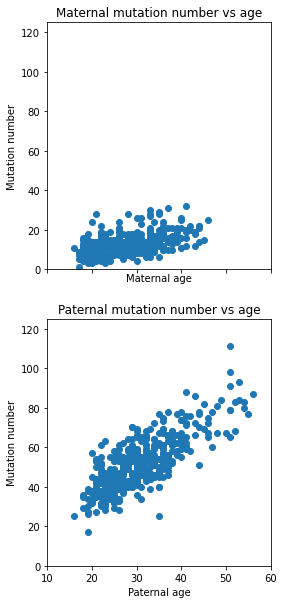

In [7]:
fig, ax = plt.subplots(nrows = 2, figsize = (4, 10), sharex=True, sharey=True)
ax[0].scatter(x = plotting_df['Mother_age'], y = plotting_df['mat_dnm'])
ax[1].scatter(x = plotting_df['Father_age'], y = plotting_df['pat_dnm'])
ax[0].set_title('Maternal mutation number vs age')
ax[1].set_title('Paternal mutation number vs age')
ax[0].set_xlabel('Maternal age')
ax[0].set_ylabel('Mutation number')
ax[1].set_xlabel('Paternal age')
ax[1].set_ylabel('Mutation number')
ax[0].set_xlim(10, 60)
ax[0].set_ylim(0, 125)

## Linear Regression

In [8]:
model = smf.ols(formula = "mat_dnm ~ 1 + Mother_age", data = plotting_df) 
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mat_dnm   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     116.0
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           6.88e-24
Time:                        15:12:47   Log-Likelihood:                -1158.1
No. Observations:                 396   AIC:                             2320.
Df Residuals:                     394   BIC:                             2328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5040      0.981      2.553      0.011       0.576       4.432
Mother_age     0.3776      0.035     10.772      0.000       0.309       0.446
==============================================================================
Omnibus:                       51.143   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.501
Skew:                           0.845   Prob(JB):                     4.03e-17
Kurtosis:                       4.310   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
model = smf.ols(formula = "pat_dnm ~ 1 + Father_age", data = plotting_df) 
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pat_dnm   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     639.6
Date:                Fri, 04 Sep 2020   Prob (F-statistic):           1.55e-84
Time:                        15:12:47   Log-Likelihood:                -1406.6
No. Observations:                 396   AIC:                             2817.
Df Residuals:                     394   BIC:                             2825.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3263      1.702      6.066      0.000       6.979      13.673
Father_age     1.3538      0.054     25.291      0.000       1.249       1.459
==============================================================================
Omnibus:                        7.687   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.185
Skew:                           0.256   Prob(JB):                       0.0167
Kurtosis:                       3.483   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Both relationships have highly significant p-values, indicating that both maternal and paternal ages have significant impact on number of mutations. It is worth noting that male age has a much larger impact on mutation number than female age. The F statistic is more than higher and the slope is 1.35838 vs 0.3776. 

## Number of Maternal vs Paternal Mutations Histogram

<function matplotlib.pyplot.show>

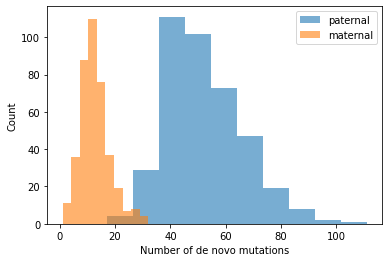

In [18]:
fig, ax = plt.subplots()
ax.hist( plotting_df["pat_dnm"],  alpha = 0.6, label = 'paternal')
ax.hist( plotting_df["mat_dnm"],  alpha = 0.6, label = 'maternal')
ax.set_xlabel('Number of de novo mutations')
ax.set_ylabel('Count')
plt.legend()
plt.show

In [11]:
stats.ttest_ind(plotting_df["pat_dnm"], 
                plotting_df["mat_dnm"])

Ttest_indResult(statistic=53.403565287269245, pvalue=2.1986031793078793e-264)

## Fitting Poisson Model

In [12]:
model = smf.poisson(formula = "mat_dnm ~ 1 + Mother_age", data = plotting_df) 
mat_results = model.fit()
mat_results.summary()

Optimization terminated successfully.
         Current function value: 2.927974
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                 0.07164
Time:                        15:12:47   Log-Likelihood:                -1159.5
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 8.241e-41
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7671      0.060     29.235      0.000       1.649       1.886
Mother_age     0.0281      0.002     13.582      0.000       0.024       0.032
==============================================================================
"""

In [13]:
pat_model = smf.poisson(formula = "pat_dnm ~ 1 + Father_age", data = plotting_df) 
pat_results = pat_model.fit()
pat_results.summary()

Optimization terminated successfully.
         Current function value: 3.578620
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                pat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                  0.2277
Time:                        15:12:48   Log-Likelihood:                -1417.1
converged:                       True   LL-Null:                       -1834.9
Covariance Type:            nonrobust   LLR p-value:                1.004e-183
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1903      0.027    116.856      0.000       3.137       3.244
Father_age     0.0241      0.001     29.608      0.000       0.023       0.026
==============================================================================
"""

In [14]:
model = smf.poisson(formula = "mat_dnm ~ 1 + pat_dnm", data = plotting_df) 
mat_vs_pat_results = model.fit()
mat_vs_pat_results.summary()

Optimization terminated successfully.
         Current function value: 3.011762
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:                mat_dnm   No. Observations:                  396
Model:                        Poisson   Df Residuals:                      394
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 Sep 2020   Pseudo R-squ.:                 0.04507
Time:                        15:12:48   Log-Likelihood:                -1192.7
converged:                       True   LL-Null:                       -1248.9
Covariance Type:            nonrobust   LLR p-value:                 2.662e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9885      0.055     36.355      0.000       1.881       2.096
pat_dnm        0.0105      0.001     10.793      0.000       0.009       0.012
==============================================================================
"""

## Predicting from Poisson

In [15]:
pat_results.params

Intercept     3.190257
Father_age    0.024096
dtype: float64

In [16]:
math.exp(3.190257 + 0.024096*50.5)

82.03163782612788